In [187]:
import networkx as nx
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [188]:
DATASET_NAME = 'USpowerGrid'


In [189]:
rp_path = 'data/rp_pos/USpowerGrid.json'
op_path = 'data/optimization/all_USpowerGrid.json'

In [190]:
# with open(rp_path) as f:
#     for row in f.readlines():
#         rdata = json.load(f)

with open(op_path) as f:
    odata = json.load(f)


In [191]:
quality_metrics_names = [
    'angular_resolution',
    'aspect_ratio',
    'crossing_angle_maximization',
    'crossing_number',
    'gabriel_graph_property',
    'ideal_edge_length',
    'node_resolution',
    'shape_based_metrics',
    'stress'
]

d = {}

for name in quality_metrics_names:
    d[name] = []



In [192]:
points = {}
for qname in quality_metrics_names:
    points[qname] = []
for trial_n in odata['data']:
    t = odata['data'][trial_n]
    q = t['quality']
    for qname in q:
        points[qname].append(q[qname])

for qname in quality_metrics_names:
    d[qname].append(points[qname])


In [193]:
for i in d['stress']:
    print(min(i))

351116.55104103783


In [194]:
# limit = 200

with open(rp_path) as f:
    points = {}
    for qname in quality_metrics_names:
        points[qname] = []
    for row in f.readlines():
        rdata = json.loads(row)
        # limit -= 1
        # if limit < 0:
        #     break

        q = rdata['quality_metrics']
        for qname in q:
            points[qname].append(q[qname])

    for qname in quality_metrics_names:
        d[qname].append(points[qname])


In [195]:
for i in d['stress']:
    print(len(i))
    break

93


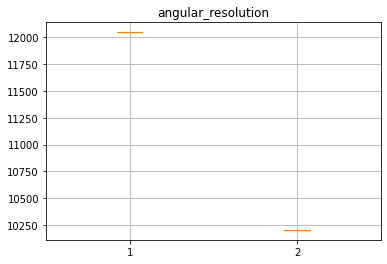

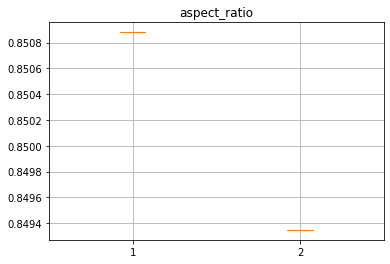

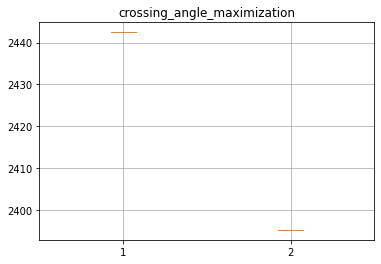

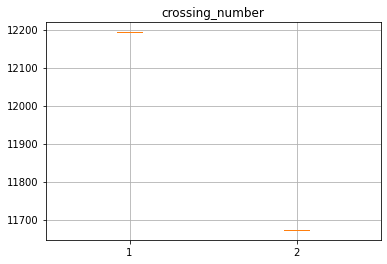

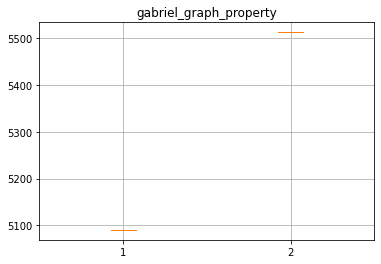

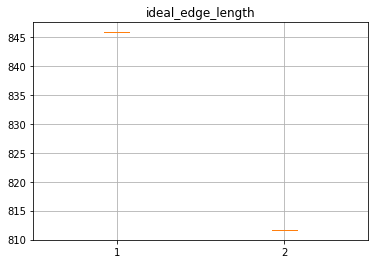

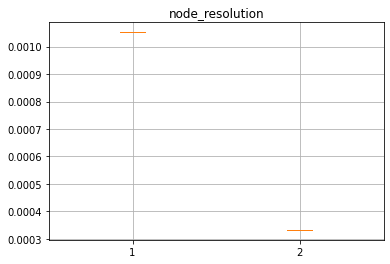

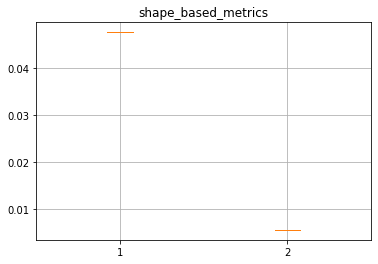

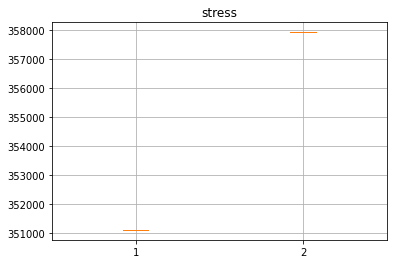

In [198]:
for qname in d:
    m1 = [min(d[qname][0])]
    m2 = [min(d[qname][1])]
    bp = plt.boxplot([m1,m2])
    # bp = plt.boxplot(d[qname])
    plt.title(qname)
    plt.grid()
    plt.show()